In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

→ Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

→ Для визуализации вы можете использовать любую из изученных библиотек.

→ Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).

→ При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните «Искусство визуализации».

В качестве ответа вставьте в форму ниже ссылку на ноутбук или сам файл в формате IPYNB. Ментор проверит ваше решение и даст свою оценку и комментарии.

→ В файле должно содержаться 10 графиков — 10 ответов к заданиям.

→ Каждый график и преобразования к нему выполняются в отдельной ячейке.

→ Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика

#### 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

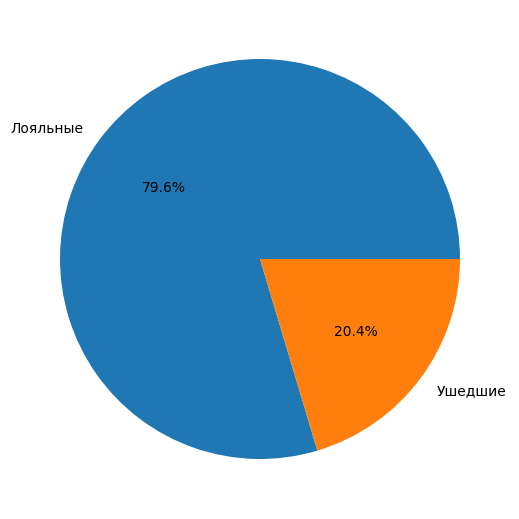

In [16]:
# Сделаем копию исходных данных
churn_data_df = churn_data.copy()
# Преобразуем таблицу, удалим лишнее
#display(churn_data_df.memory_usage())
churn_data_df['Exited'] = churn_data_df['Exited'].astype('category')
churn_data_df['Gender'] = churn_data_df['Gender'].astype('category')
churn_data_df['HasCrCard'] = churn_data_df['HasCrCard'].astype('category')
churn_data_df['IsActiveMember'] = churn_data_df['IsActiveMember'].astype('category')
#display(churn_data_df.memory_usage())
churn_data_df = churn_data_df.drop('RowNumber', axis=1)
exited_clients = churn_data_df['Exited'].value_counts()
#display(exited_clients)
groups = ['Лояльные', 'Ушедшие']
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes((1, 1, 1, 1))
ax.pie(exited_clients, labels=groups, autopct='%1.1f%%');

Из графика видно, что процент лояльных клиентов намного выше, чем ушедших.

#### 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2500 долларов. Опишите распределение и сделайте выводы.

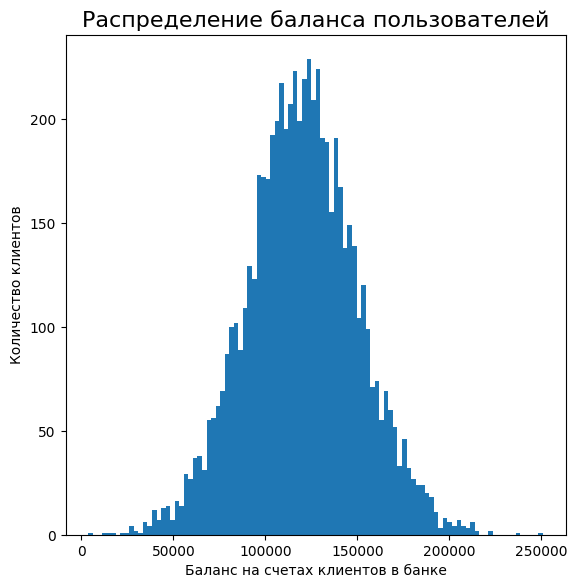

In [17]:
#display(churn_data_df['Balance'].head(15))
mask = churn_data_df['Balance']>2500
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_axes((0, 0, 1, 1))
ax2.hist(churn_data_df[mask]['Balance'],bins=100);
ax2.set_title('Распределение баланса пользователей', fontsize=16);
ax2.set_xlabel('Баланс на счетах клиентов в банке');
ax2.set_ylabel('Количество клиентов');

Распределение баланса пользователей похоже на нормальное с максимумом в районе 125000 долларов. На счетах у клиентов банка в основном находится от 50000 до 200000 долларов.

#### 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счете ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке?

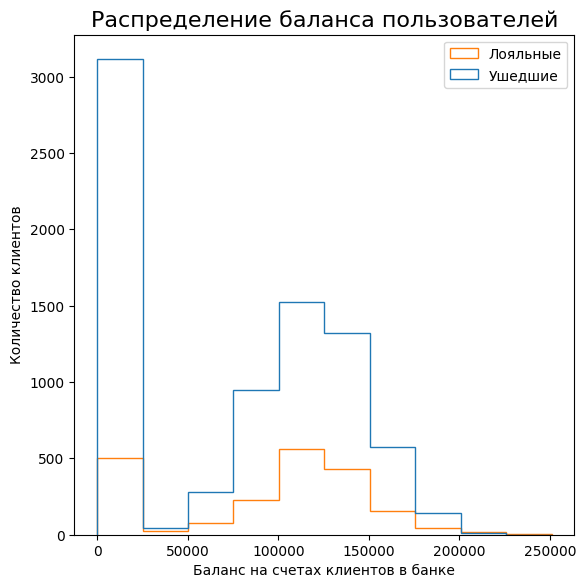

In [18]:
mask1 = churn_data_df['Exited'] == 0
mask2 = churn_data_df['Exited'] == 1
fig3 = plt.figure(figsize=(5, 5))
ax3 = fig3.add_axes((0, 0, 1, 1))
ax3.hist([churn_data_df[mask1]['Balance'], churn_data_df[mask2]['Balance']],bins=10, histtype='step',density=False);
ax3.set_title('Распределение баланса пользователей', fontsize=16);
ax3.set_xlabel('Баланс на счетах клиентов в банке');
ax3.set_ylabel('Количество клиентов');
ax3.legend(labels=['Лояльные', 'Ушедшие']);

Из графиков можно видеть, что среди ушедших клиентов много тех, у кого баланс равен 0. Это могло повлиять на их решение уйти из банка.

#### 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

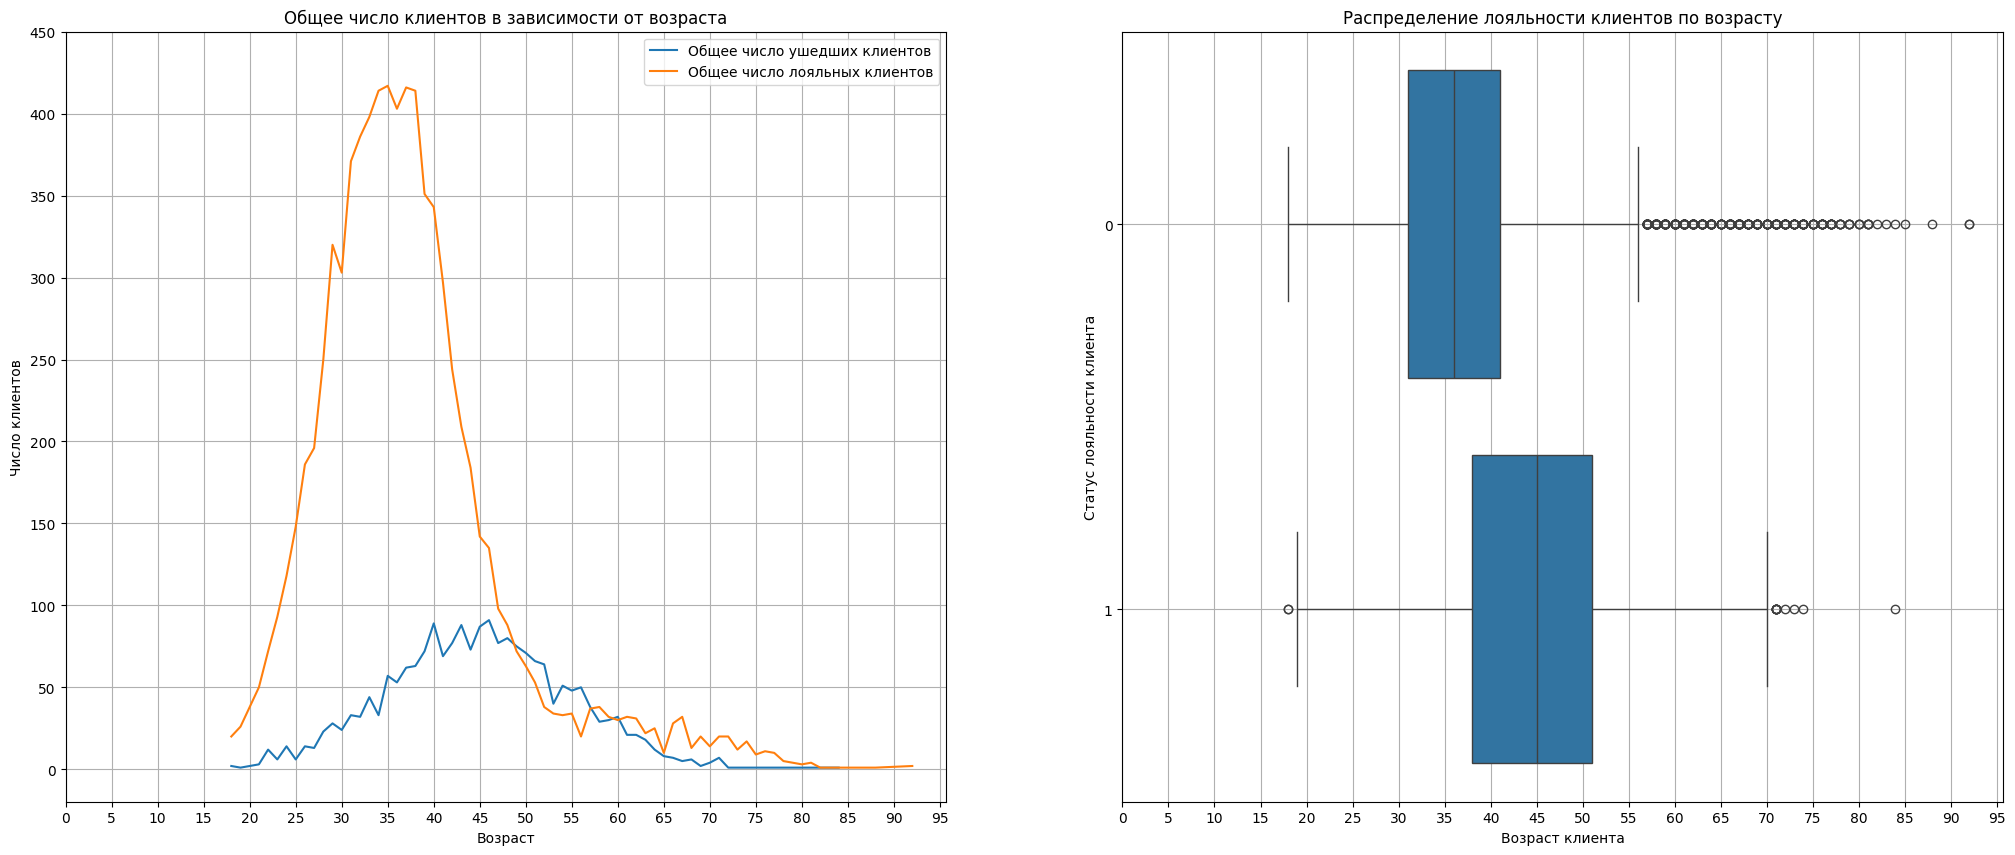

In [19]:
import seaborn as sns
mask1 = churn_data_df['Exited'] == 0
mask2 = churn_data_df['Exited'] == 1

age_of_not_exited = churn_data_df[mask1].groupby('Age')['Exited'].count()
age_of_exited = churn_data_df[mask2].groupby('Age')['Exited'].count()
#display(age_of_not_exited)

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
#axes[1] = plt.boxplot([age_of_exited, age_of_not_exited],vert=False)

#fig = plt.figure(figsize=(10, 4))
#axes[0] = fig.add_axes([0,0,1,1])
axes[0].plot(age_of_exited, label='Общее число ушедших клиентов')
axes[0].plot(age_of_not_exited, label='Общее число лояльных клиентов')
axes[0].set_title('Общее число клиентов в зависимости от возраста')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Число клиентов')
axes[0].set_xticks(range(0,100,5))
axes[0].set_yticks(range(0,500,50))
axes[0].legend()
axes[0].grid()

axes[1] = sns.boxplot(churn_data_df, x='Age', y='Exited')
axes[1].set_title('Распределение лояльности клиентов по возрасту');
axes[1].set_xlabel('Возраст клиента');
axes[1].set_ylabel('Статус лояльности клиента');
axes[1].set_xticks(range(0,100,5))
axes[1].grid()

Из графиков видно, что возраст большинства клиентов лежит в диапазоне от 25 до 45 лет. Также видно, что потенциальных выбросов больше среди лояльных клиентов. Банку следует обратить внимание на возрастную категорию от 40 до 55 лет, так как среди этой категории наблюдается сильное снижение числа лояльных клиентов и наибольшее число ушедших клиентов.

#### 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

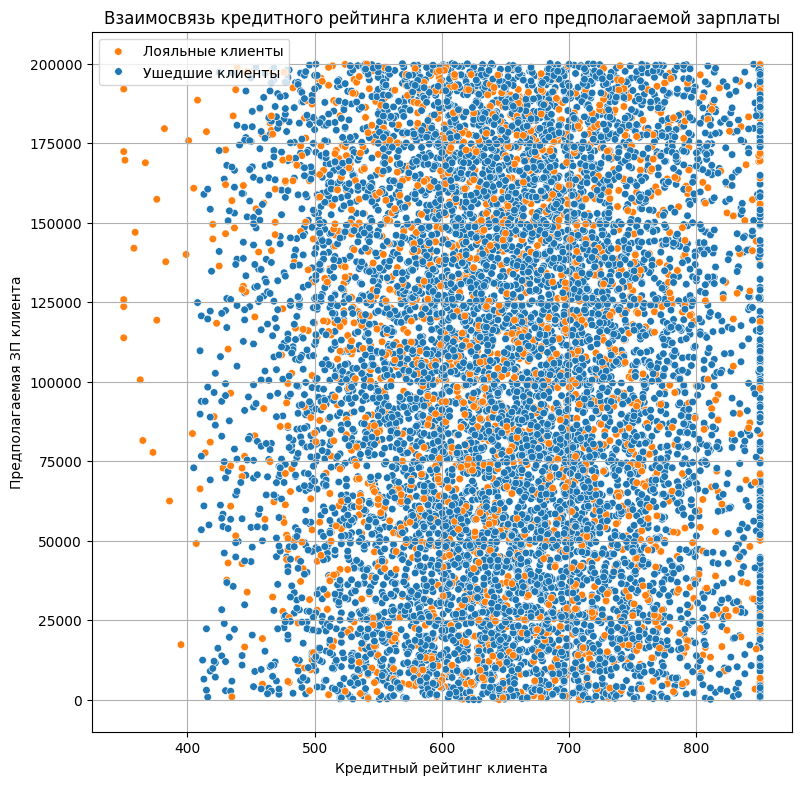

In [20]:
fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0,0,1,1])
axes = sns.scatterplot(
    data = churn_data_df,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    hue = 'Exited',
    s=30
)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая ЗП клиента')
axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
axes.legend(['Лояльные клиенты', 'Ушедшие клиенты'])
axes.grid()

Взаимосвязь между кредитным рейтингом и предполагаемой ЗП клиента не прослеживается. Среди лояльных есть клиенты с более низким кредитным рейтингом вне зависимости от уровня ЗП.

#### 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

C:\Users\user\AppData\Local\Temp\ipykernel_3956\2596564901.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exited_genders = churn_data_df[(churn_data_df['Exited']==1)].groupby(by='Gender')['Exited'].count()


Text(0.5, 1.0, 'Отток клиентов в зависимости от пола')

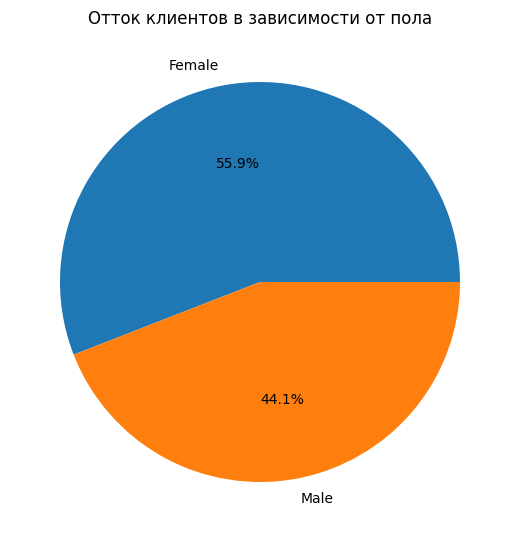

In [21]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0,0,1,1])

exited_genders = churn_data_df[(churn_data_df['Exited']==1)].groupby(by='Gender')['Exited'].count()
#display(exited_genders)
axes.pie(exited_genders, labels=exited_genders.index, autopct='%1.1f%%');
axes.set_title('Отток клиентов в зависимости от пола')

Из графика видно, что среди ушедших клиентов больше женщин. При этом оба значения различаются незначительно, можно сделать вывод, что отток клиентов не зависит от пола клиента.

#### 9.7 Как отток клиентов зависит от числа приобретенных у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

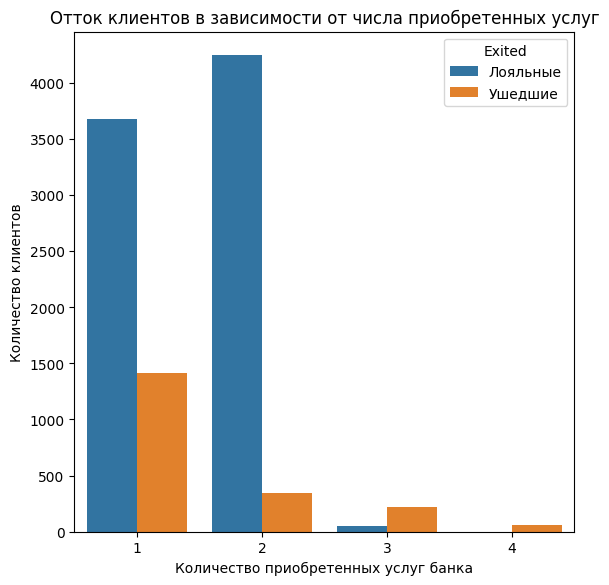

In [22]:
count_products = churn_data_df.groupby(by='NumOfProducts')['Exited'].value_counts()
#display(count_products)
# Преобразуем в DataFrame
count_products = count_products.reset_index();
count_products['Exited'] = count_products['Exited'].apply(lambda x: 'Лояльные' if x==0 else 'Ушедшие')
#display(count_products)

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0,0,1,1])
axes = sns.barplot(data=count_products, x='NumOfProducts', y='count',hue='Exited')
axes.set_title('Отток клиентов в зависимости от числа приобретенных услуг')
axes.set_xlabel('Количество приобретенных услуг банка');
axes.set_ylabel('Количество клиентов');
#axes.legend(['a', 'b'])

Количество лояльных клиентов велико среди клиентов с числом приобретенных услуг 1 и 2. Далее происходит резкое падение. Среди ушедших клиентов большинство приобрело одну услугу. С ростом числа услуг количество ушедших клиентов незначительно падает. При этом среди клиентов, приобретших 3 и 4 услуги, ушедших становится больше, чем лояльных. Можно сделать вывод, что что банку не стоит навязывать клиентам дополнительные услуги.

#### 9.8 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

C:\Users\user\AppData\Local\Temp\ipykernel_3956\3992522188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exited_active = churn_data_df[(churn_data_df['Exited']==1)].groupby(by='IsActiveMember')['Exited'].count()
C:\Users\user\AppData\Local\Temp\ipykernel_3956\3992522188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_exited_active = churn_data_df[(churn_data_df['Exited']==0)].groupby(by='IsActiveMember')['Exited'].count()


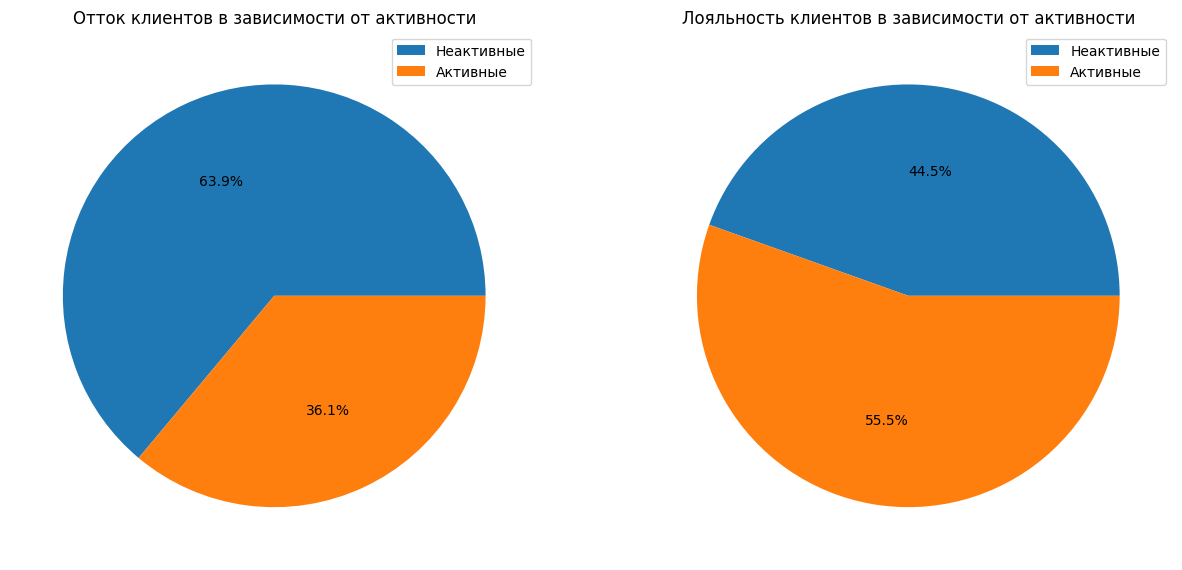

In [23]:
exited_active = churn_data_df[(churn_data_df['Exited']==1)].groupby(by='IsActiveMember')['Exited'].count()
not_exited_active = churn_data_df[(churn_data_df['Exited']==0)].groupby(by='IsActiveMember')['Exited'].count()
#display(exited_active)

"""fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0,0,1,1])"""
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].pie(exited_active, autopct='%1.1f%%')
axes[0].set_title('Отток клиентов в зависимости от активности')
axes[0].legend(['Неактивные','Активные']);
axes[1].pie(not_exited_active, autopct='%1.1f%%')
axes[1].set_title('Лояльность клиентов в зависимости от активности')
axes[1].legend(['Неактивные','Активные']);

Из диаграмм видно, что среди активных клиентов больше лояльных и меньше ушедших соотвественно. Таким образом, активность клиентов влияет на их лояльность. Возможно, банку стоит предлагать дополнительные услуги неактивным клиентам или улучшать им услловия по имеющимся.

#### 9.9  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [44]:
# Вернём тип для рассчёта среднего (лучше бы и не переводил в category, пользы мало, а проблем получилось много :) )
churn_data_df['Exited'] = churn_data_df['Exited'].astype('int64')
#churn_data_df.info()
#display(churn_data_df['Geography'].nunique())

# Относительный отток по странам
churn_extited_countries = churn_data_df.groupby(['Geography'], as_index=False)[['Exited']].mean()
#display(churn_extited_countries)
# Для определения range_color
display(churn_extited_countries['Exited'].max())

import plotly.express as px

fig = px.choropleth(data_frame=churn_extited_countries,
                    locations='Geography',
                    locationmode='country names',
                    color='Exited',
                    range_color=[0, 0.4],
                    title='Доля ушедших клиентов по странам',
                    width=800,
                    height=600,
                    color_continuous_scale='Reds',
                    scope='world')
fig.show()

np.float64(0.32443204463929853)

По картограмме видно, что наибольшая доля ушедших клиентов в Германии. Возможно, это связано с тем, что в Германии находится меньшее количество отделений банка. Но, в целом, требуется больше данных.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

#### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

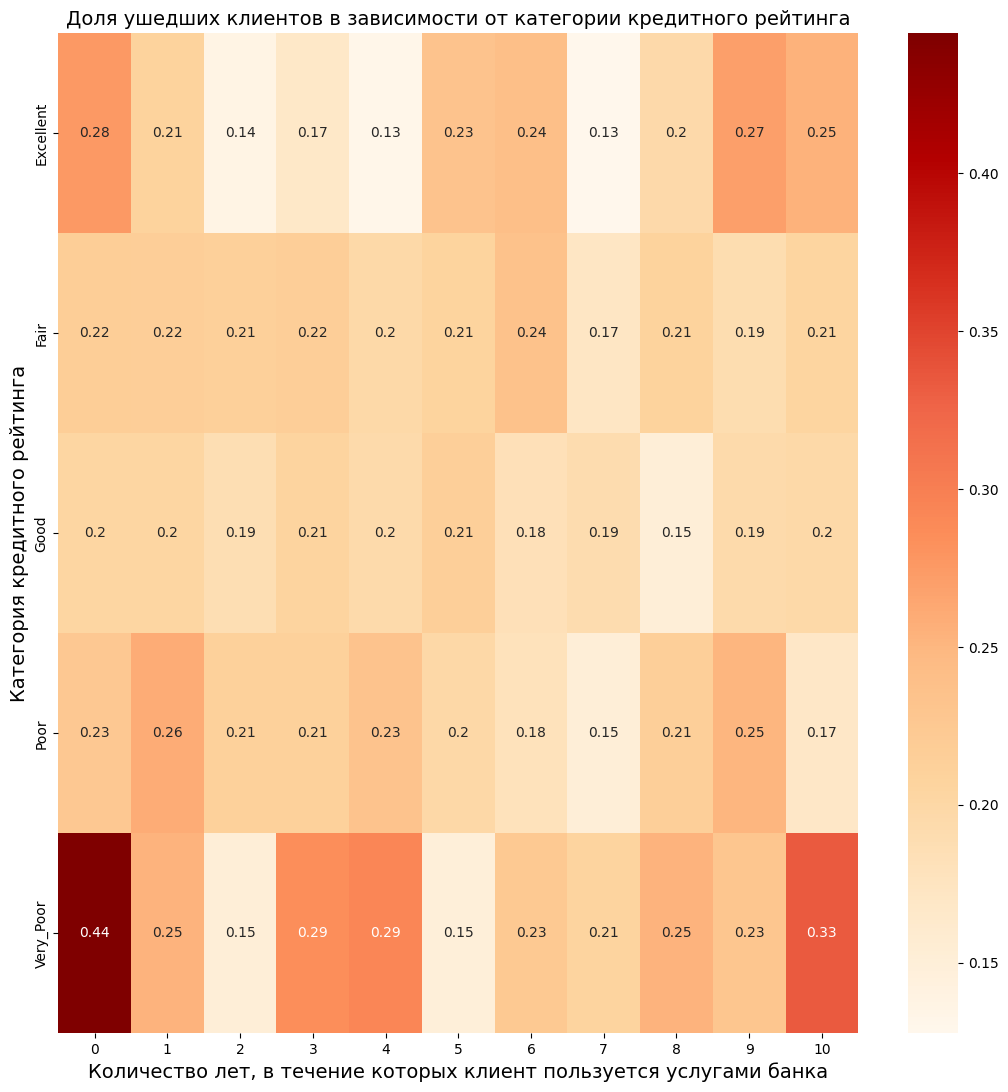

In [72]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Создадим столбец CreditScoreCat
churn_data_df['CreditScoreCat'] = churn_data_df['CreditScore'].apply(get_credit_score_cat)
#display(churn_data_df['CreditScoreCat'].head(5))

# Создадим сводную таблицу, которая показывает долю ушедших клиентов в зависимости от категории кредитного рейтинга
# и количества лет, в течение которых клиент пользуется услугами банка
pivot_tab = churn_data_df.pivot_table(index='CreditScoreCat',
                                      columns='Tenure',
                                      values='Exited',
                                      aggfunc='mean')
#display(pivot_tab)

fig = plt.figure(figsize=(10, 10))
axes = fig.add_axes([0,0,1,1])
axes = sns.heatmap(data=pivot_tab, cmap='OrRd', annot=True)
axes.set_title('Доля ушедших клиентов в зависимости от категории кредитного рейтинга', size=14)
axes.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка', size=14);
axes.set_ylabel('Категория кредитного рейтинга', size=14);


По тепловой карте можно видеть, что чаще всего уходят клиенты с категорией кредитного рейтинга Very_Poor, причем в основном в первый и десятый год пользования услугами банка. Возможно, это клиенты, которые стали клиентами банка, чтобы взять какой-либо целевой кредит, и другие услуги банка им неинтересны.